In [1]:
import pandas as pd 
#分別讀取四個城市的CSV資料
data_a = pd.read_csv('A_lvr_land_A.csv')
data_b = pd.read_csv('B_lvr_land_A.csv')
data_e = pd.read_csv('E_lvr_land_A.csv')
data_f = pd.read_csv('F_lvr_land_A.csv')


C:\Users\sunny\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
#刪除csv中第二列英文翻譯,iloc是使用位置索引
data_a = data_a.iloc[1:]
data_b = data_b.iloc[1:]
data_e = data_e.iloc[1:]
data_f = data_f.iloc[1:]



In [3]:
data_a['city'] = 'Taipei'
data_b['city'] = 'Taichung'
data_e['city'] = 'Kaohsiung'
data_f['city'] = 'New Taipei'



In [4]:
#串聯四個CSV資料

all_data = pd.concat([data_a,data_b,data_e,data_f],axis=0) #axis=0 為直向合併



# 2. 資料清理與切片¶

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制

1.交易年月日，限制在109年
2.建物現況格局-房，1~5間
3.建物現況格局-廳，1~2廳


In [ ]:
以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用

1.利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2.取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())
3.觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4.做資料切片將
   新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
   1.交易年月日(tx_dt_year)，限制在109年
   2.建物現況格局-房(room_number)，限制在1到5間
   3.建物現況格局-廳(hall_number)，限制在1到2廳
   4.最後運用.reset_index()重新定義索引

In [5]:
#利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }

analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [6]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
analysis_data = all_data.rename(columns=columns_mapping)
analysis_data.head(5)

,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,land_use_district,land_use,tx_dt,transaction_pen_number,shifting_level,...,berth_category,berth_area_square_meter,berth_price,note,serial_number,main_building_area,auxiliary_building_area,balcony_area,elevator,city
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei
3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,Taipei
4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,Taipei
5,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,Taipei


In [7]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())
#   (提示:先取完之後再.dropna())
analysis_data = analysis_data.loc[(analysis_data.main_use=='住家用')&(analysis_data.use_zoning=='住'),analysis_columns].dropna()
analysis_data.head(5)

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number
1,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583,3,2,2
2,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558,2,1,1
5,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825,3,2,2
7,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386,3,1,2
8,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944,5,2,2


In [8]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
analysis_data.info()
analysis_data = analysis_data.astype(columns_type)
analysis_data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 7802 entries, 1 to 11512
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        7802 non-null   object 
 1   towns                       7802 non-null   object 
 2   main_use                    7802 non-null   object 
 3   use_zoning                  7802 non-null   object 
 4   total_price                 7802 non-null   object 
 5   building_area_square_meter  7802 non-null   object 
 6   main_building_area          7802 non-null   float64
 7   tx_dt                       7802 non-null   object 
 8   unit_price                  7802 non-null   object 
 9   room_number                 7802 non-null   object 
 10  hall_number                 7802 non-null   object 
 11  health_number               7802 non-null   object 
dtypes: float64(1), object(11)
memory usage: 792.4+ KB
<class 'pandas.core.frame.DataFrame'>
I

In [9]:
#4. 做資料切片將
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
#     1.交易年月日(tx_dt_year)，限制在109年
#     2.建物現況格局-房(room_number)，限制在1到5間
#     3.建物現況格局-廳(hall_number)，限制在1到2廳
#     4.最後運用.reset_index()重新定義索引

analysis_data['tx_dt_year'] = analysis_data['tx_dt'].apply(lambda x: int(x[:-4]))
#進行資料篩選
analysis_data = analysis_data.loc[(analysis_data['tx_dt_year'] == 109)&
                                  (analysis_data['room_number'] >= 1)&
                                  (analysis_data['room_number'] <=5)&
                                  (analysis_data['hall_number'] >=1)&
                                  (analysis_data['hall_number'] <=2) ]
#重新定義index               
analysis_data = analysis_data.reset_index(drop=True)
analysis_data.head(5)



,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year
0,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109
1,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109
2,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109
3,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109
4,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109


## 3. 建立自定義特徵加入分析

以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。
定義 : 1平方公尺相當於0.3025坪
建立新特徵

1.建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
2.主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
3.單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?
如果有請將資料移除，並說明為什麼移除此資料?
移除後再用.describe()觀察是否還有奇怪的資料?

In [10]:
# 建立新特徵
# 1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025
analysis_data['building_area_square_feet'] = analysis_data.building_area_square_meter*0.3025
analysis_data['main_building_area_square_feet'] = analysis_data.main_building_area*0.3025
analysis_data['unit_price_square_feet'] = analysis_data.unit_price/0.3025
analysis_data.head(5)

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
0,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109,69.547775,33.550275,517629.752066
1,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109,11.286275,7.435450,494406.611570
2,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109,37.407150,29.868850,488677.685950
3,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109,37.585625,27.460950,212846.280992
4,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109,9.123400,7.910375,241137.190083


In [11]:
analysis_data.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.894000e+03,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.0,6894.000000,6894.000000,6.894000e+03
mean,1.138712e+07,121.712089,82.086667,94364.671163,2.850885,1.793299,1.733536,109.0,36.817907,24.831217,3.119493e+05
std,1.159445e+07,62.871712,37.363166,58317.311227,0.898498,0.404969,0.681085,0.0,19.018693,11.302358,1.927845e+05
min,0.000000e+00,0.970000,0.000000,0.000000,1.000000,1.000000,0.000000,109.0,0.293425,0.000000,0.000000e+00
25%,5.580000e+06,82.965000,60.682500,53532.250000,2.000000,2.000000,1.000000,109.0,25.096912,18.356456,1.769661e+05
50%,8.550000e+06,109.390000,78.990000,79610.000000,3.000000,2.000000,2.000000,109.0,33.090475,23.894475,2.631736e+05
75%,1.329500e+07,147.517500,95.797500,118728.250000,3.000000,2.000000,2.000000,109.0,44.624044,28.978744,3.924901e+05
max,2.250000e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000,109.0,437.097375,101.567400,2.016873e+06


可以利用.describe()做一下資料觀察，是否有奇怪的資料?
Ans:有
如果有請將資料移除，並說明為什麼移除此資料?
Ans:資料中有總價為0和主建物面積main_building_area最小為0的，進一步將其拿掉



In [13]:
analysis_data = analysis_data.loc[(analysis_data.total_price!=0)&(analysis_data.main_building_area!=0)]
analysis_data.describe()
analysis_data.head(5)

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
0,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109,69.547775,33.550275,517629.752066
1,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109,11.286275,7.435450,494406.611570
2,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109,37.407150,29.868850,488677.685950
3,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109,37.585625,27.460950,212846.280992
4,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109,9.123400,7.910375,241137.190083


# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
相關係數0.3以下為低相關，0.3~0.7為中等相關，0.7以上為高度相關

資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數(>0.7)
ANS: building_area_square_meter,main_building_area,building_area_square_feet,main_building_area_square_feet
資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數
ANS:unit_price

In [39]:
analysis_data.loc[analysis_data.city =='Taipei'].corr()[['total_price','unit_price_square_feet']]

,total_price,unit_price_square_feet
total_price,1.000000,0.581290
building_area_square_meter,0.864627,0.218185
main_building_area,0.710515,0.112488
unit_price,0.581290,1.000000
room_number,0.326441,-0.100062
hall_number,0.270787,0.004883
health_number,0.598832,0.128217
tx_dt_year,NaN,NaN
building_area_square_feet,0.864627,0.218185
main_building_area_square_feet,0.710515,0.112488


# 5. 資料視覺化並解釋¶

In [ ]:
我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道

1.以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區

2.進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
   
3.對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區
Ans:    

C:\Users\sunny\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


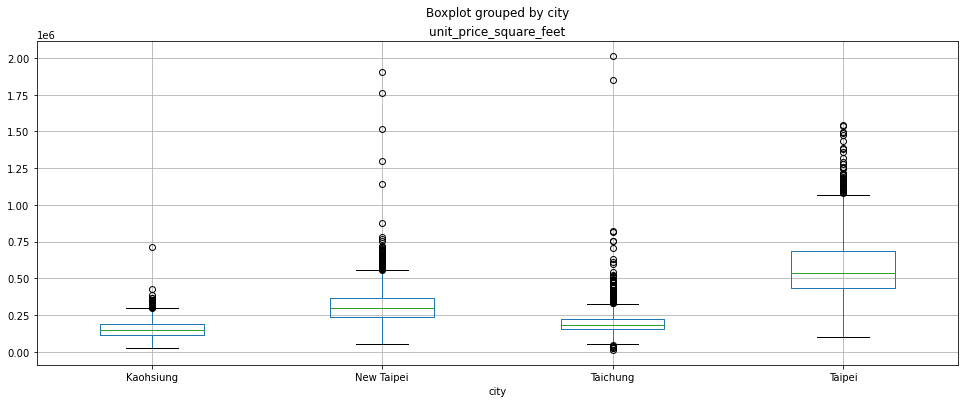

In [15]:
#找出單價元坪中位數最高的地區
analysis_data.boxplot(column=['unit_price_square_feet'],by='city',figsize=(16,6))
#ANS:單價元坪中位數最高的地區: 台北市

C:\Users\sunny\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


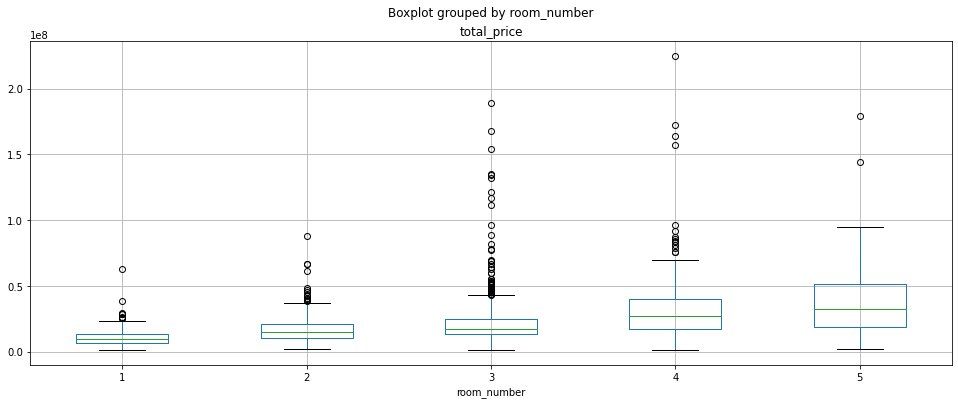

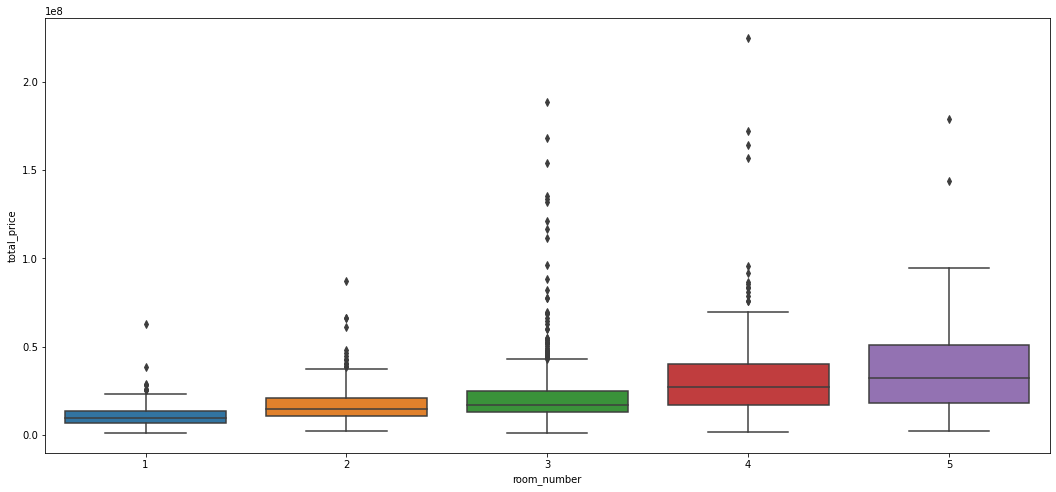

In [18]:
#找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
taipei_data = analysis_data.loc[analysis_data.city=='Taipei']
taipei_data.boxplot(column=['total_price'],by='room_number',figsize=(16,6))

##參考其他同學使用 Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (18,8))
sns.boxplot(data = analysis_data[analysis_data['city'] == 'Taipei'], x = 'room_number', y = 'total_price')

#ANS:從boxplot可看到,總價元中位數最高的房間數是'5個房間'


<ipython-input-24-957cd23a125b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taipei_data['town_label_encoding'] = le.fit_transform(taipei_data['towns'])
C:\Users\sunny\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array(['大安區'], dtype=object)

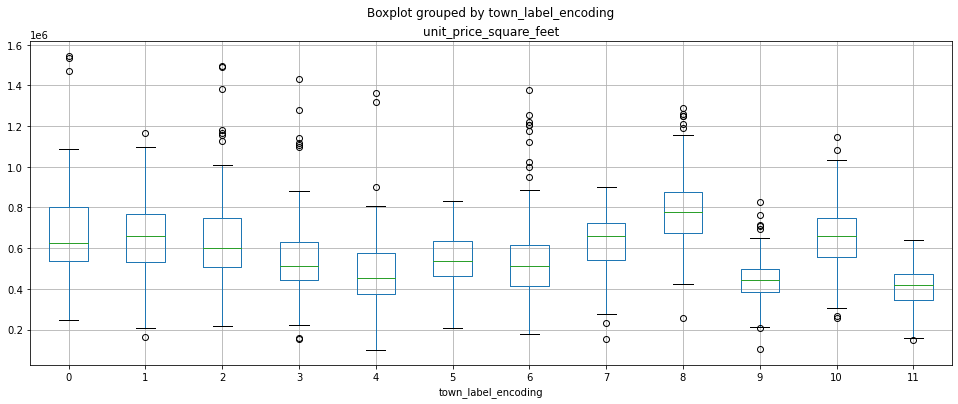

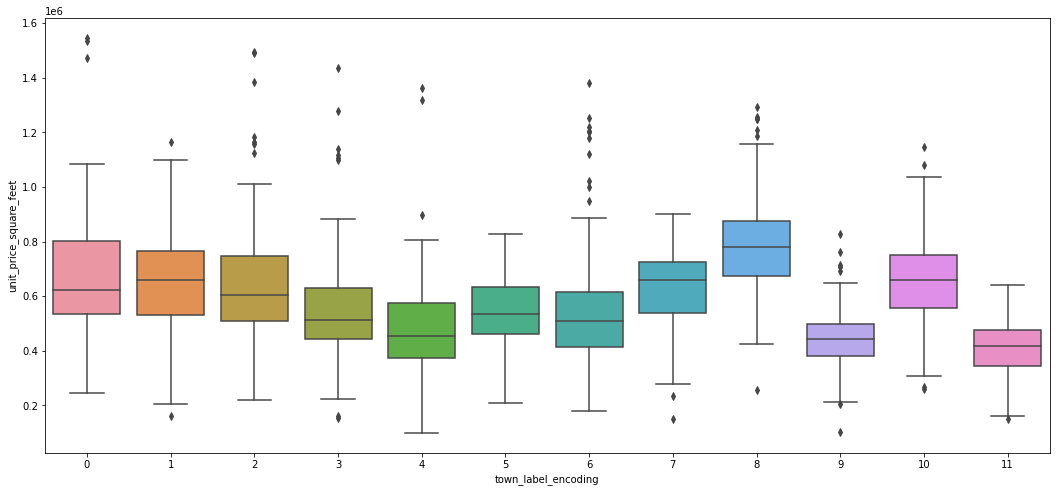

In [24]:
#3.對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder().fit(analysis_data['towns'].values)
#analysis_data['towns_2'] = le.transform(analysis_data['towns'].values)

#參考subaru219同學的寫法,覺得比較精簡
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
taipei_data['town_label_encoding'] = le.fit_transform(taipei_data['towns'])

#方法一

taipei_data.boxplot(column=['unit_price_square_feet'],by='town_label_encoding',figsize=(16,6))


#方法二：
fig = plt.figure(figsize = (18,8))
sns.boxplot(data = taipei_data[taipei_data['city'] == 'Taipei'], x = 'town_label_encoding', y = 'unit_price_square_feet')
#從圖表中可以看到編號8的單價元坪為中位數最高地區,使用le.inverse反向查詢
le.inverse_transform([8])

#ANS:結果為[大安區]的單價元坪為中位數最高地區